In [1]:
#basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
train_df = pd.read_csv('/Users/aadityajoshi/Downloads/playground-series-s5e1/train.csv',index_col=0)
test_df = pd.read_csv('/Users/aadityajoshi/Downloads/playground-series-s5e1/test.csv',index_col=0)

In [3]:
train_df.head()

,date,country,store,product,num_sold
id,,,,,
0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [4]:
test_df.head()

,date,country,store,product
id,,,,
230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
230131,2017-01-01,Canada,Discount Stickers,Kaggle
230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
230133,2017-01-01,Canada,Discount Stickers,Kerneler
230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230130 entries, 0 to 230129
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   date      230130 non-null  object 
 1   country   230130 non-null  object 
 2   store     230130 non-null  object 
 3   product   230130 non-null  object 
 4   num_sold  221259 non-null  float64
dtypes: float64(1), object(4)
memory usage: 10.5+ MB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98550 entries, 230130 to 328679
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     98550 non-null  object
 1   country  98550 non-null  object
 2   store    98550 non-null  object
 3   product  98550 non-null  object
dtypes: object(4)
memory usage: 3.8+ MB


### check missing and duplicates

In [7]:
#label is missing for ~9k instances, which cant be imputed
train_df.isna().sum()

date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

In [8]:
test_df.isna().sum()

date       0
country    0
store      0
product    0
dtype: int64

In [9]:
#drop missing from train
train_df.dropna(inplace=True)

In [10]:
#drop duplicates
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

In [11]:
from ydata_profiling import ProfileReport
report = ProfileReport(train_df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### converting datetime object into year month etc

In [12]:
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

In [13]:
train_df['Year'] = train_df['date'].dt.year
test_df['Year'] = test_df['date'].dt.year

In [14]:
train_df['Month'] = train_df['date'].dt.month
test_df['Month'] = test_df['date'].dt.month

In [15]:
train_df['Day'] = train_df['date'].dt.day
test_df['Day'] = test_df['date'].dt.day

In [16]:
train_df.head()

,date,country,store,product,num_sold,Year,Month,Day
id,,,,,,,,
1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,2010,1,1
2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,1,1
3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,2010,1,1
4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,1,1
5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0,2010,1,1


In [17]:
train_df.drop('date',axis=1,inplace=True)
test_df.drop('date',axis=1,inplace=True)

In [18]:
train_df.head()

,country,store,product,num_sold,Year,Month,Day
id,,,,,,,
1,Canada,Discount Stickers,Kaggle,973.0,2010,1,1
2,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,1,1
3,Canada,Discount Stickers,Kerneler,423.0,2010,1,1
4,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,1,1
5,Canada,Stickers for Less,Holographic Goose,300.0,2010,1,1


### EDA

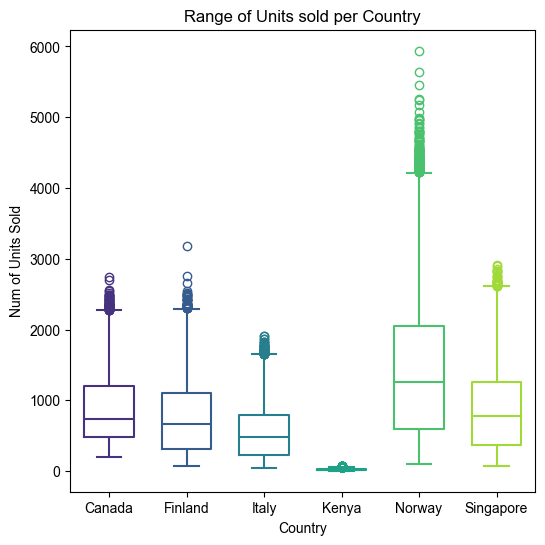

In [19]:
#per country num_sol units
%matplotlib inline
plt.figure(figsize=(6,6))
plt.title('Range of Units sold per Country')
sns.boxplot(y='num_sold',x='country',data=train_df,gap=0.2,width=0.8,fill=False,palette='viridis')
sns.set_style('white')
plt.xlabel('Country')
plt.ylabel('Num of Units Sold')
plt.show()

### total sold unit per country

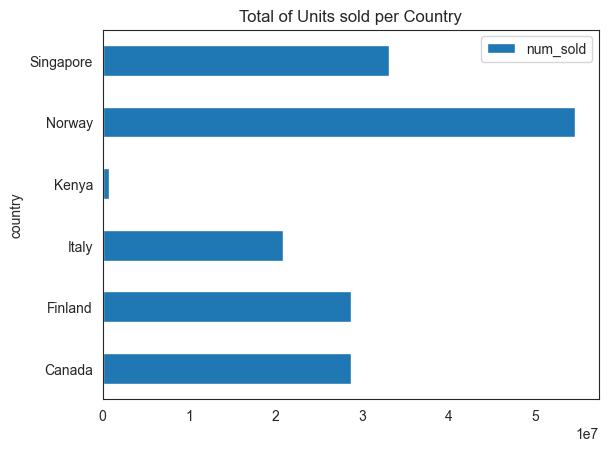

In [20]:
pd.DataFrame(train_df.groupby('country')['num_sold'].sum()).plot(kind='barh')
plt.title('Total of Units sold per Country')
plt.show()

### Average units per country per instance

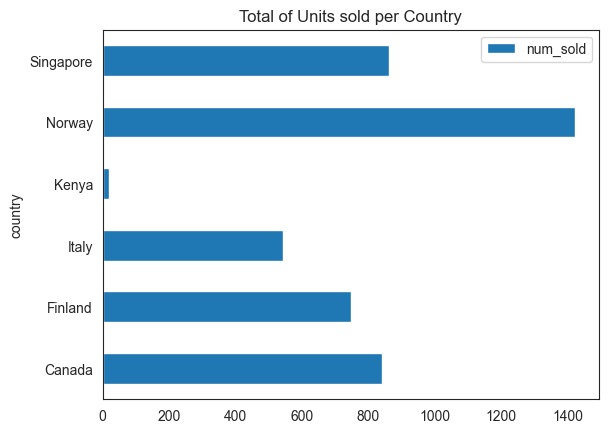

In [21]:
pd.DataFrame(train_df.groupby('country')['num_sold'].mean()).plot(kind='barh')
plt.title('Total of Units sold per Country')
plt.show()

In [22]:
#norway is the country where most stickers are sold total, but also on avg

### Store per Country

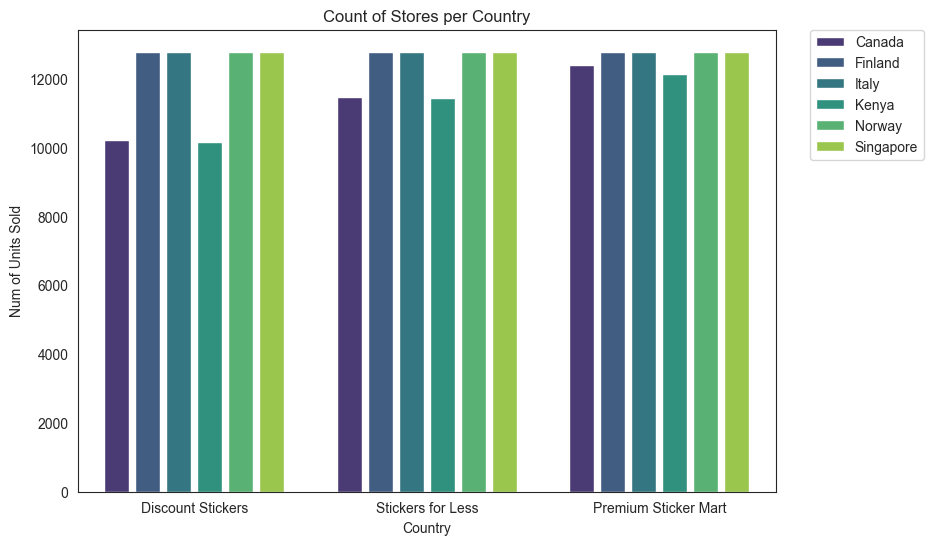

In [23]:
plt.figure(figsize=(9,6))
plt.title('Count of Stores per Country')
sns.countplot(x='store',data=train_df,gap=0.2,width=0.8,palette='viridis',hue='country')
sns.set_style('white')
plt.xlabel('Country')
plt.ylabel('Num of Units Sold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
#stores are evenly distributed with the execption of canada and kenya for Store class 0 and store class1

### total units per store

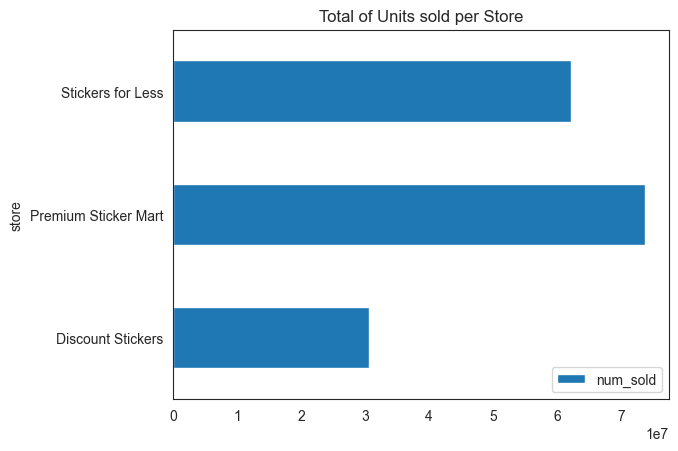

In [24]:
#premium sticker mart has most sales followed by stickers for less and discount stickers
pd.DataFrame(train_df.groupby('store')['num_sold'].sum()).plot(kind='barh')
plt.title('Total of Units sold per Store')
plt.show()

### Average num of units per sale for everry store

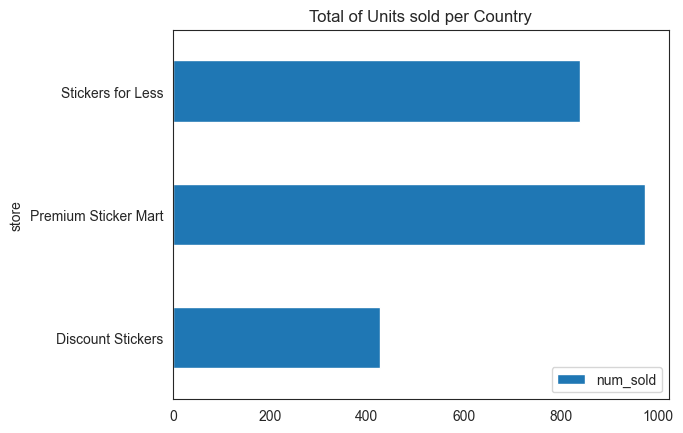

In [25]:
pd.DataFrame(train_df.groupby('store')['num_sold'].mean()).plot(kind='barh')
plt.title('Total of Units sold per Country')
plt.show()

### Store sales by years

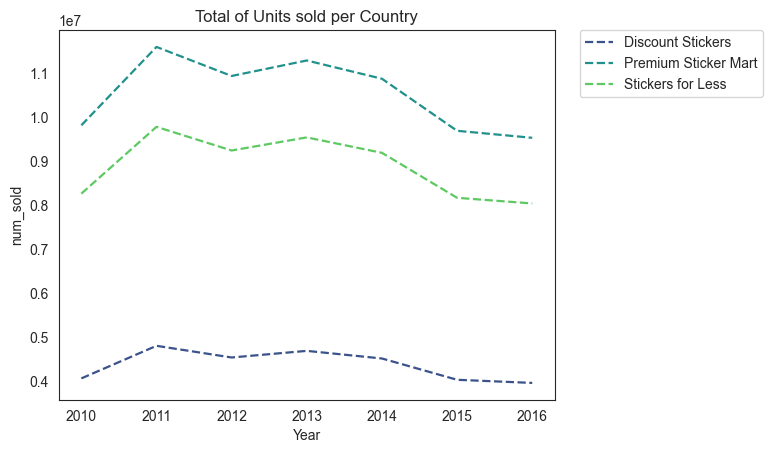

In [26]:
#total unit for every store reached peak in 2011 and has dropped since
plt.title('Total of Units sold per Country')
sale_df = pd.DataFrame(train_df.groupby(['Year','store'])['num_sold'].sum())
sns.lineplot(x='Year',y='num_sold',data=sale_df,hue='store',palette='viridis',linewidth=1.6,linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### per month mean sales

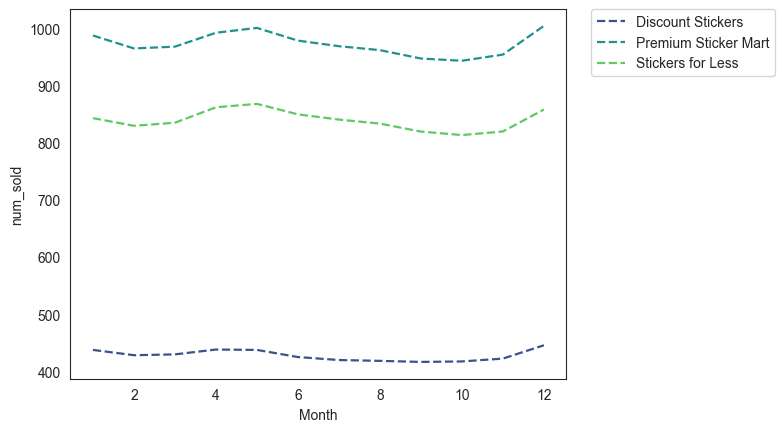

In [27]:
sale_df = pd.DataFrame(train_df.groupby(['Month','store'])['num_sold'].mean())
sns.lineplot(x='Month',y='num_sold',data=sale_df,hue='store',palette='viridis',linewidth=1.6,linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Countplots of cat variables

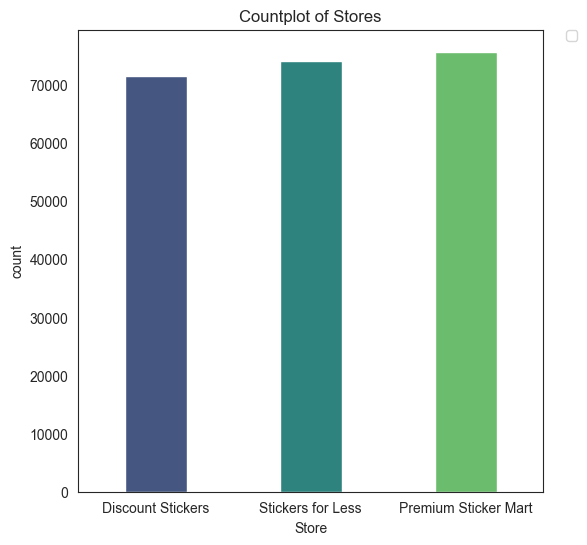

In [28]:
plt.figure(figsize=(6,6))
plt.title('Countplot of Stores')
sns.countplot(x='store',data=train_df,gap=0.2,width=0.5,palette='viridis')
sns.set_style('white')
plt.xlabel('Store')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

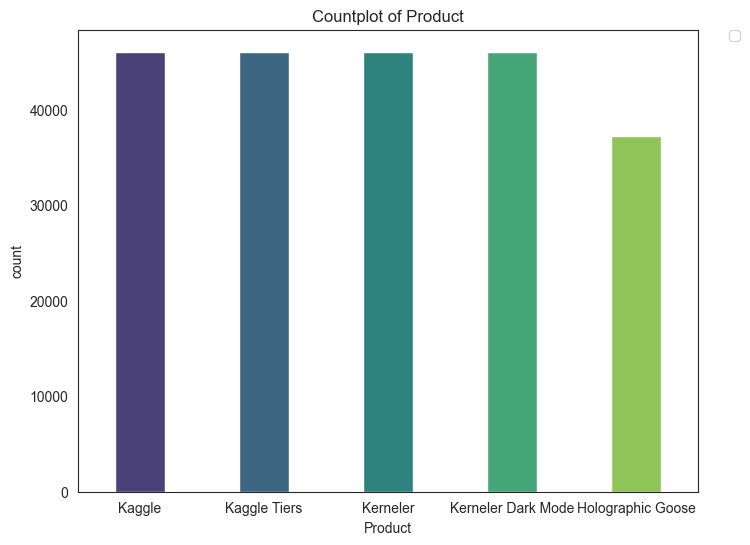

In [29]:
plt.figure(figsize=(8,6))
plt.title('Countplot of Product')
sns.countplot(x='product',data=train_df,gap=0.2,width=0.5,palette='viridis')
sns.set_style('white')
plt.xlabel('Product')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

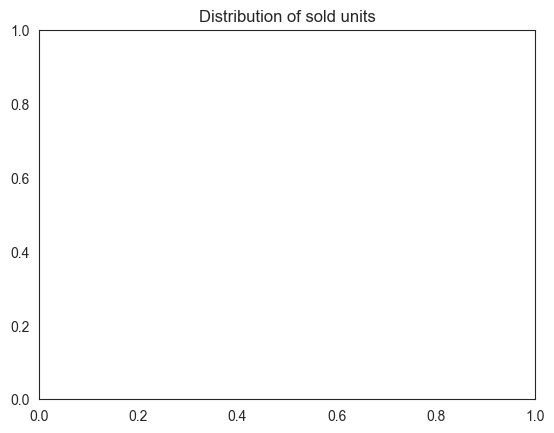

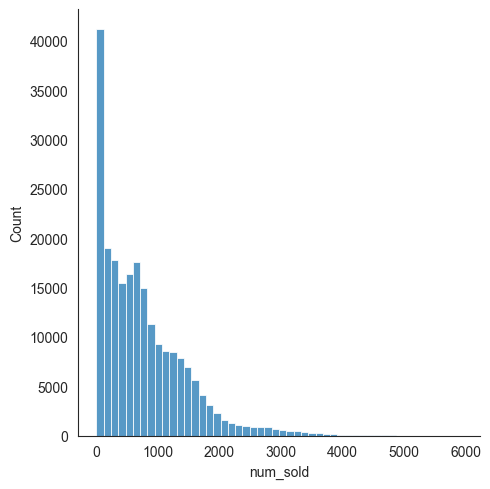

In [30]:
plt.title('Distribution of sold units')
sns.displot(x='num_sold',data=train_df,bins=50)
plt.show()

### units sold by day

In [31]:
pd.DataFrame(train_df.groupby('Day')['num_sold'].mean()).sort_values('num_sold',ascending=False).style.background_gradient('viridis')

,num_sold
Day,
31,780.787465
30,769.790359
29,769.207351
1,761.598293
28,761.479989
6,760.866190
27,758.834802
5,756.641473
3,755.618864


### by month

In [32]:
pd.DataFrame(train_df.groupby('Month')['num_sold'].mean()).sort_values('num_sold',ascending=False).style.background_gradient('viridis')

,num_sold
Month,
12,776.707487
5,773.683160
4,770.098847
1,763.121159
6,755.115937
3,750.933596
2,747.806792
7,746.890914
8,742.297260


### one hot encoding cat var

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221259 entries, 1 to 230129
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   country   221259 non-null  object 
 1   store     221259 non-null  object 
 2   product   221259 non-null  object 
 3   num_sold  221259 non-null  float64
 4   Year      221259 non-null  int32  
 5   Month     221259 non-null  int32  
 6   Day       221259 non-null  int32  
dtypes: float64(1), int32(3), object(3)
memory usage: 19.0+ MB


In [34]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98550 entries, 230130 to 328679
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  98550 non-null  object
 1   store    98550 non-null  object
 2   product  98550 non-null  object
 3   Year     98550 non-null  int32 
 4   Month    98550 non-null  int32 
 5   Day      98550 non-null  int32 
dtypes: int32(3), object(3)
memory usage: 4.1+ MB


In [35]:
cat_cols = ['country','store','product']
train_df = pd.get_dummies(train_df,cat_cols)
test_df = pd.get_dummies(test_df,cat_cols)

In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221259 entries, 1 to 230129
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   num_sold                    221259 non-null  float64
 1   Year                        221259 non-null  int32  
 2   Month                       221259 non-null  int32  
 3   Day                         221259 non-null  int32  
 4   country_Canada              221259 non-null  bool   
 5   country_Finland             221259 non-null  bool   
 6   country_Italy               221259 non-null  bool   
 7   country_Kenya               221259 non-null  bool   
 8   country_Norway              221259 non-null  bool   
 9   country_Singapore           221259 non-null  bool   
 10  store_Discount Stickers     221259 non-null  bool   
 11  store_Premium Sticker Mart  221259 non-null  bool   
 12  store_Stickers for Less     221259 non-null  bool   
 13  product_Holographic

In [37]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98550 entries, 230130 to 328679
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Year                        98550 non-null  int32
 1   Month                       98550 non-null  int32
 2   Day                         98550 non-null  int32
 3   country_Canada              98550 non-null  bool 
 4   country_Finland             98550 non-null  bool 
 5   country_Italy               98550 non-null  bool 
 6   country_Kenya               98550 non-null  bool 
 7   country_Norway              98550 non-null  bool 
 8   country_Singapore           98550 non-null  bool 
 9   store_Discount Stickers     98550 non-null  bool 
 10  store_Premium Sticker Mart  98550 non-null  bool 
 11  store_Stickers for Less     98550 non-null  bool 
 12  product_Holographic Goose   98550 non-null  bool 
 13  product_Kaggle              98550 non-null  bool 
 14  produ

### converting datatype for memory

In [38]:
train_df['Year'] = train_df['Year'].astype('int8')
test_df['Year'] = test_df['Year'].astype('int8')
train_df['Month'] = train_df['Month'].astype('int8')
test_df['Month'] = test_df['Month'].astype('int8')
train_df['Day'] = train_df['Day'].astype('int8')
test_df['Day'] = test_df['Day'].astype('int8')
train_df['num_sold'] = train_df['num_sold'].astype('int16')

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221259 entries, 1 to 230129
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   num_sold                    221259 non-null  int16
 1   Year                        221259 non-null  int8 
 2   Month                       221259 non-null  int8 
 3   Day                         221259 non-null  int8 
 4   country_Canada              221259 non-null  bool 
 5   country_Finland             221259 non-null  bool 
 6   country_Italy               221259 non-null  bool 
 7   country_Kenya               221259 non-null  bool 
 8   country_Norway              221259 non-null  bool 
 9   country_Singapore           221259 non-null  bool 
 10  store_Discount Stickers     221259 non-null  bool 
 11  store_Premium Sticker Mart  221259 non-null  bool 
 12  store_Stickers for Less     221259 non-null  bool 
 13  product_Holographic Goose   221259 non-null  bool

In [40]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98550 entries, 230130 to 328679
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Year                        98550 non-null  int8 
 1   Month                       98550 non-null  int8 
 2   Day                         98550 non-null  int8 
 3   country_Canada              98550 non-null  bool 
 4   country_Finland             98550 non-null  bool 
 5   country_Italy               98550 non-null  bool 
 6   country_Kenya               98550 non-null  bool 
 7   country_Norway              98550 non-null  bool 
 8   country_Singapore           98550 non-null  bool 
 9   store_Discount Stickers     98550 non-null  bool 
 10  store_Premium Sticker Mart  98550 non-null  bool 
 11  store_Stickers for Less     98550 non-null  bool 
 12  product_Holographic Goose   98550 non-null  bool 
 13  product_Kaggle              98550 non-null  bool 
 14  produ

### split and pre process

In [41]:
X_train = train_df.drop('num_sold',axis=1)
y_train = train_df['num_sold']
X_test = test_df

In [42]:
#validation set
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.15,random_state=42)

In [43]:
#std scaling
from sklearn.preprocessing import StandardScaler
std_sclr = StandardScaler()
X_train = std_sclr.fit_transform(X_train)
X_val = std_sclr.transform(X_val)
X_test = std_sclr.transform(X_test)

### models

In [44]:
#traning model
import time
def train_model(model,name,X_train=X_train,y_train=y_train,X_test=X_test,X_val=X_val,y_val=y_val):
    #fit model
    print(name,"\n")
    start = time.time()
    model.fit(X_train,y_train)
    #validation check
    pred_test = model.predict(X_test)
    pred_model_val = model.predict(X_val)
    end = time.time()
    print(f"Time Taken for Train + Pred : {(end-start)} sec")
    print(f"R2 Score : {r2_score(y_val,pred_model_val)}","\n")
    print(f"RMSE : {np.sqrt(mean_squared_error(y_val,pred_model_val))}","\n")
    print(f"MAE : {(mean_absolute_error(y_val,pred_model_val))}","\n")
    print(f"Target Varible Mean : {train_df['num_sold'].mean()}")
    print(f"Target Varible Std Dev : {train_df['num_sold'].std()}")
    new_test_df = pd.read_csv('/Users/aadityajoshi/Downloads/playground-series-s5e1/test.csv')
    pred_df = pd.DataFrame(pred_test,columns=["num_sold"])
    pred_df = pd.concat([pred_df,new_test_df['id']],axis=1)
    pred_df.set_index("id",inplace=True)
    pred_df.to_csv("ps_s5_e1_"+str(name)+".csv")

In [45]:
#linear regression
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
train_model(linear_reg,"Linear Regression")

Linear Regression 

Time Taken for Train + Pred : 0.035431861877441406 sec
R2 Score : 0.7900797294125347 

RMSE : 317.1899491455015 

MAE : 224.7800054126938 

Target Varible Mean : 752.527381937006
Target Varible Std Dev : 690.1654449850502


In [46]:
#elastic net
from sklearn.linear_model import ElasticNetCV
e_net_cv = ElasticNetCV()
train_model(e_net_cv,"ElasticNet")

ElasticNet 

Time Taken for Train + Pred : 0.870413064956665 sec
R2 Score : 0.7535413270328816 

RMSE : 343.6879308118899 

MAE : 231.86932444127012 

Target Varible Mean : 752.527381937006
Target Varible Std Dev : 690.1654449850502


In [47]:
#ridge
from sklearn.linear_model import RidgeCV
ridge = RidgeCV()
train_model(ridge,"RidgeCV")

RidgeCV 

Time Taken for Train + Pred : 0.1402430534362793 sec
R2 Score : 0.7900770984764472 

RMSE : 317.19193681412145 

MAE : 224.77272246897155 

Target Varible Mean : 752.527381937006
Target Varible Std Dev : 690.1654449850502


### tree based models

In [48]:
#tree based models working much better than linear models
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
train_model(dtree,"DTREE")

DTREE 

Time Taken for Train + Pred : 0.3643498420715332 sec
R2 Score : 0.9580298919441621 

RMSE : 141.82809585548057 

MAE : 79.22902166380428 

Target Varible Mean : 752.527381937006
Target Varible Std Dev : 690.1654449850502


In [49]:
#rfc
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
train_model(rfc,"RandomForest")

RandomForest 

Time Taken for Train + Pred : 21.205833911895752 sec
R2 Score : 0.9741889551106162 

RMSE : 111.22310667937329 

MAE : 63.741290186507584 

Target Varible Mean : 752.527381937006
Target Varible Std Dev : 690.1654449850502


### optuna with Random Forest

In [50]:
import optuna
from sklearn.model_selection import cross_val_score
def objective(trial):
    params = {
        'max_depth' : trial.suggest_categorical('max_depth',[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]),
        'min_samples_leaf': trial.suggest_categorical('min_samples_leaf',[1,2,4]),
        'min_samples_split': trial.suggest_categorical('min_samples_split',[2,5,10]),
        'n_estimators': trial.suggest_categorical('n_estimators',[200, 400, 600, 800, 1000, 1200]),
        'warm_start': trial.suggest_categorical('warm_start',[True,False]),
        'criterion' : trial.suggest_categorical('criterion',["squared_error", "absolute_error", "friedman_mse", "poisson"])
    }
    rfc = RandomForestRegressor(**params)
    cv_score = cross_val_score(rfc,X_train,y_train,cv=3,n_jobs=-1,scoring='neg_mean_squared_error')
    return np.mean(cv_score)

In [ ]:
rfc_study = optuna.create_study(direction='maximize',study_name='rfc_optuna')
rfc_study.optimize(objective,n_trials=50)

[I 2025-01-25 09:56:49,696] A new study created in memory with name: rfc_optuna


In [ ]:
cross_val_score()